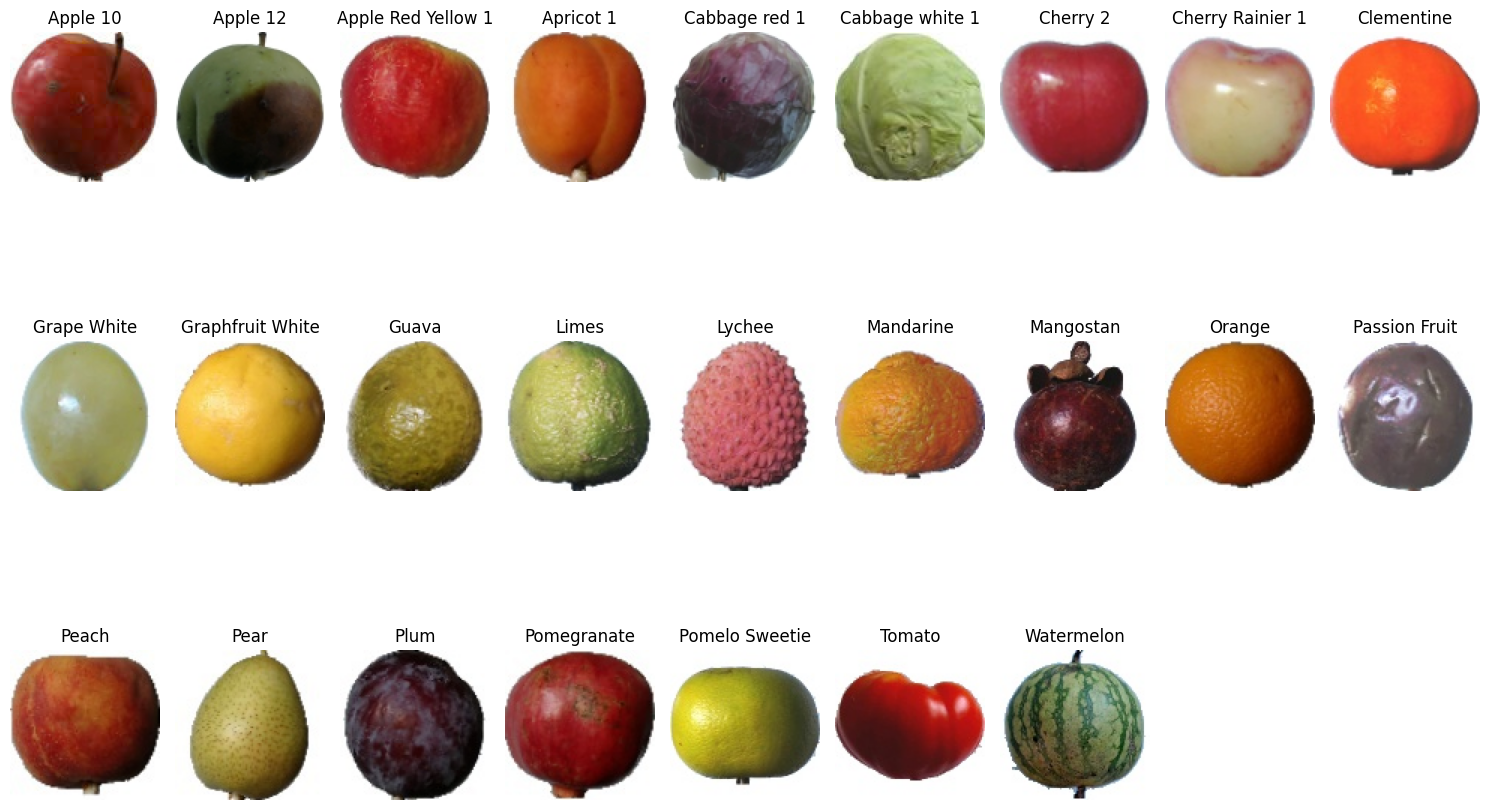

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Đường dẫn đến folder "Ảnh trái cây"
folder_path = "Ảnh trái cây"

# Duyệt qua các folder con
subfolders = ["Data_An", "Data_Lập", "Data_Minh"]
fruit_images = {}

for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
        # Duyệt qua các folder loại quả
        for fruit_folder in os.listdir(subfolder_path):
            fruit_folder_path = os.path.join(subfolder_path, fruit_folder)
            if os.path.isdir(fruit_folder_path):
                # Lấy danh sách ảnh trong folder loại quả
                images = os.listdir(fruit_folder_path)
                for image in images:
                    if image.lower().endswith(('.png', '.jpg', '.jpeg')):
                        # Lưu ảnh đầu tiên của mỗi loại quả
                        if fruit_folder not in fruit_images:
                            fruit_images[fruit_folder] = os.path.join(fruit_folder_path, image)
                        break

# Hiển thị mỗi loại quả một ảnh
plt.figure(figsize=(15, 10))
for i, (fruit, image_path) in enumerate(fruit_images.items()):
    img = mpimg.imread(image_path)
    plt.subplot(3, (len(fruit_images) + 2) // 3, i + 1)
    plt.imshow(img)
    plt.title(fruit)
    plt.axis('off')

plt.tight_layout()
plt.show()

Kích thước ảnh: (100, 100, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)


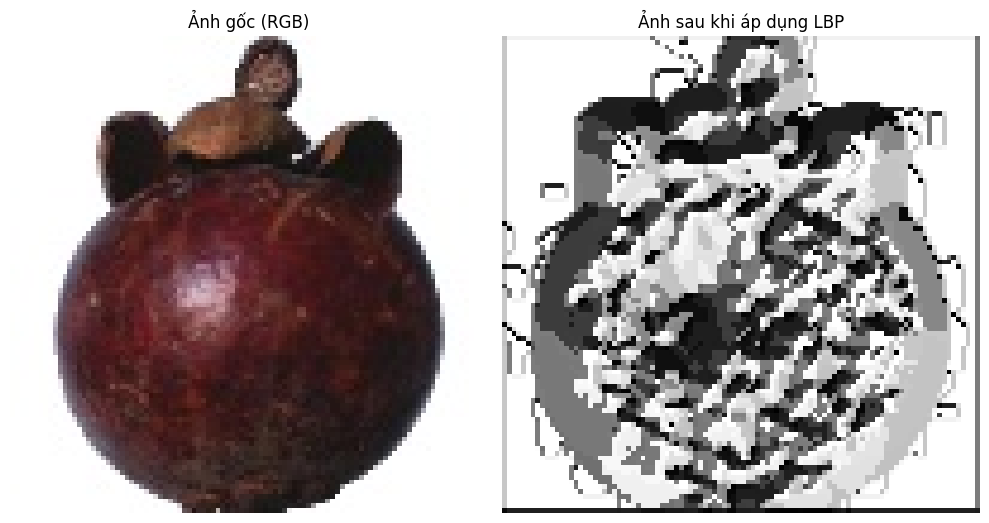

Kích thước ảnh: (232, 218, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)


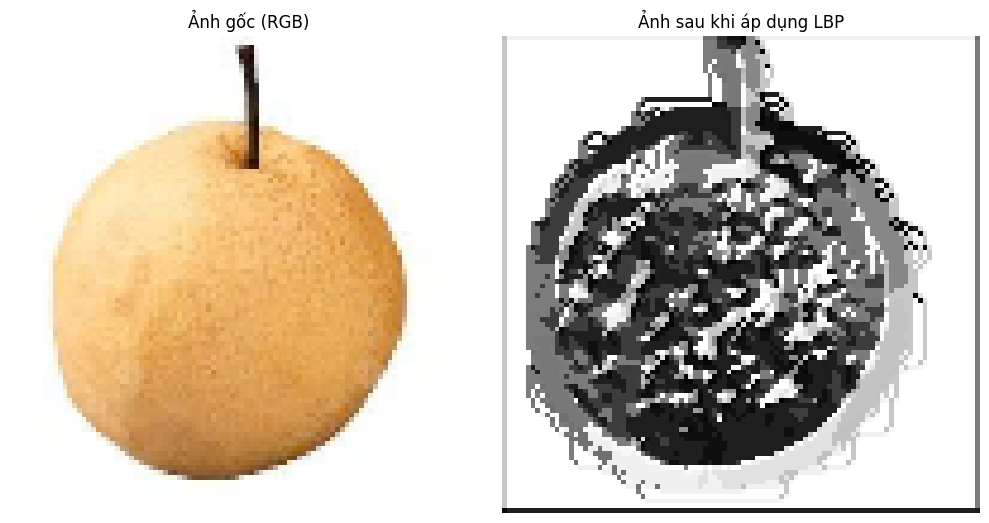

Kích thước ảnh: (100, 100, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)


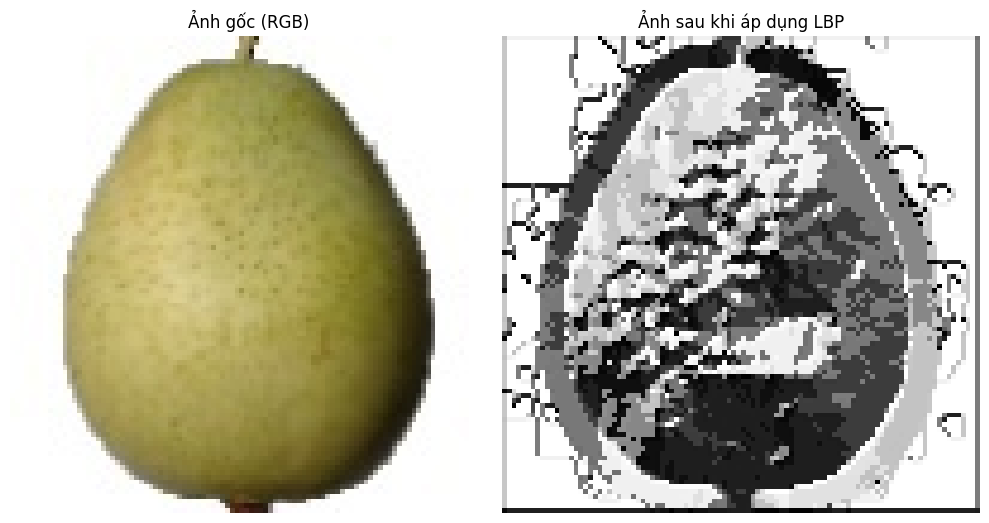

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = "Image_data/5_100.jpg"

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))
print("Kích thước ảnh sau khi thay đổi:", image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Áp dụng LBP
lbp = local_binary_pattern(blurred, LBP_POINTS, LBP_RADIUS, method="default")

# Hiển thị ảnh gốc và ảnh LBP
plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')

plt.tight_layout()
plt.show()

#-----------------------------------------------------------------------------------
# Đọc ảnh và chuyển sang grayscale
image_path = "Image_test\z6589008469632_8da5ed5bbeb31f203a08456d8f0fae20.jpg"

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


# Áp dụng LBP
lbp = local_binary_pattern(blurred, LBP_POINTS, LBP_RADIUS, method="default")

# Hiển thị ảnh gốc và ảnh LBP
plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')

plt.tight_layout()
plt.show()

#--------------------------------------------------------------
# Đọc ảnh và chuyển sang grayscale
image_path = "Image_test/178_100.jpg"

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(blurred)

# Áp dụng LBP
lbp = local_binary_pattern(enhanced, LBP_POINTS, LBP_RADIUS, method="default")

# Hiển thị ảnh gốc và ảnh LBP
plt.figure(figsize=(10, 20))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')

plt.tight_layout()
plt.show()




Kích thước ảnh: (320, 387, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)


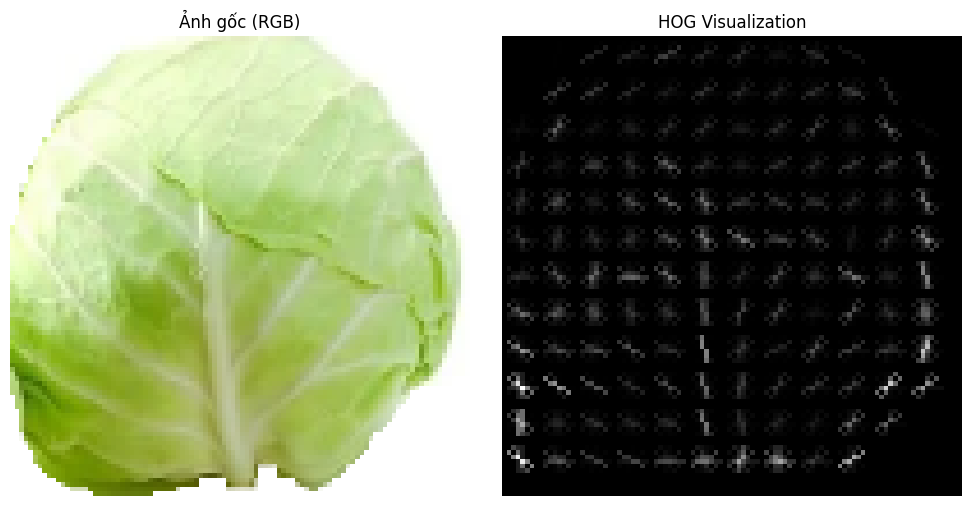

In [14]:
from skimage.feature import hog

def extract_hog_features(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9, visualize=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if visualize:
        hog_features, hog_image = hog(gray,
                                      orientations=orientations,
                                      pixels_per_cell=pixels_per_cell,
                                      cells_per_block=cells_per_block,
                                      block_norm='L2-Hys',
                                      visualize=True)
        return hog_features, hog_image
    else:
        hog_features = hog(gray,
                           orientations=orientations,
                           pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block,
                           block_norm='L2-Hys',
                           visualize=False)
        return hog_features

# Đọc ảnh và chuyển sang grayscale
image_path = "Image_test\Screenshot 2025-05-08 203034.png"

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hog_features, hog_vis = extract_hog_features(image_rgb, visualize=True)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_vis, cmap='gray')  # Dùng ảnh HOG visualization
plt.title('HOG Visualization')
plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
import cv2
import numpy as np

LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# === Tạo bảng ánh xạ từ mã nhị phân 8-bit → mã "uniform"
def uniform_lbp_mapping():
    mapping = np.zeros(256, dtype=np.uint8)
    index = 0
    for i in range(256):
        b = format(i, '08b')  # chuyển sang chuỗi nhị phân 8 bit
        transitions = sum((b[i] != b[(i+1)%8]) for i in range(8))  # đếm số lần chuyển đổi 0-1
        if transitions <= 2:
            mapping[i] = index
            index += 1
        else:
            mapping[i] = 58  # tất cả mã không-uniform gán vào index cuối
    return mapping

uniform_mapping = uniform_lbp_mapping()

# === Tính toán LBP-Uniform thủ công
def compute_lbp_uniform(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray.shape
    lbp_image = np.zeros((h-2, w-2), dtype=np.uint8)

    # Vị trí 8 pixel lân cận (chiều kim đồng hồ)
    offsets = [(-1, -1), (-1, 0), (-1, 1),
               ( 0, 1),  (1, 1),  (1, 0),
               (1, -1), (0, -1)]

    for i in range(1, h-1):
        for j in range(1, w-1):
            center = gray[i, j]
            binary_str = ''
            for dy, dx in offsets:
                neighbor = gray[i + dy, j + dx]
                binary_str += '1' if neighbor >= center else '0'
            lbp_code = int(binary_str, 2)
            lbp_image[i-1, j-1] = uniform_mapping[lbp_code]

    return lbp_image

# === Trích xuất histogram LBP-Uniform
def extract_lbp_features(image):
    lbp = compute_lbp_uniform(image)
    hist, _ = np.histogram(lbp.ravel(), bins=59, range=(0, 59))  # 58 uniform patterns + 1 non-uniform
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_test/Screenshot 2025-05-19 114613.png'
image = cv2.imread(image_path)

lbp = extract_lbp_features(image=image)
print(lbp)


[0.02935027 0.01054923 0.0043023  0.0058167  0.01095365 0.00610066
 0.01020505 0.00363114 0.00567903 0.01051481 0.02638168 0.01050621
 0.00518857 0.01091062 0.03499488 0.03284373 0.00434532 0.00519717
 0.00694391 0.02254403 0.01278643 0.00948226 0.00967156 0.00598019
 0.01095365 0.02969445 0.01602175 0.00821739 0.00935319 0.00392369
 0.00527462 0.0074946  0.02554704 0.0114183  0.01077295 0.01469665
 0.00627275 0.01234759 0.03502069 0.01714895 0.00896599 0.01017063
 0.0099297  0.03490023 0.01433525 0.00892296 0.01309619 0.02624401
 0.01943778 0.00857017 0.00826041 0.01114295 0.00913808 0.01337154
 0.00807111 0.00900901 0.01287247 0.08394641 0.17057745]


[[193. 241. 241. ... 225. 112. 112.]
 [199. 255. 255. ...  64.  60. 124.]
 [199. 255. 255. ...  64. 252. 124.]
 ...
 [  0. 255. 103. ... 147. 195.   0.]
 [  7.   0.  16. ... 239.  64.  52.]
 [  6.  31.  15. ...   1.   0.  28.]]


(np.float64(-0.5), np.float64(350.5), np.float64(334.5), np.float64(-0.5))

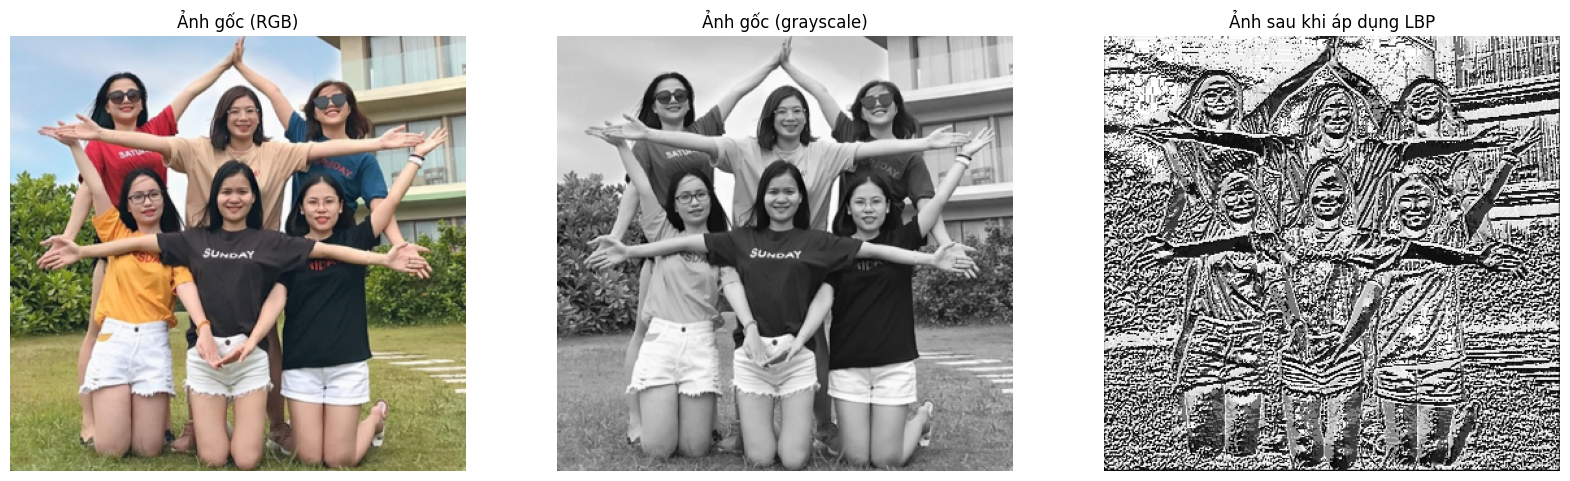

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_test/Screenshot 2025-05-19 114613.png'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)

# # In ra kích thước của ảnh
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="default")
print(lbp)
# (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
# hist = hist.astype("float")
# hist /= (hist.sum() + 1e-7)

# print("Histogram LBP:", hist)
# In ra ma trix LBP
# print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
# plt.figure(figsize=(10, 5))
# plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
# plt.title('Histogram LBP')

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


[[129. 225. 225. ... 225.  96. 112.]
 [131. 255. 255. ...  64.  60. 124.]
 [131. 255. 255. ...  64. 252. 124.]
 ...
 [  0. 255. 103. ... 147. 195.   0.]
 [  7.   0.  16. ... 239.  64.  52.]
 [  6.  31.  15. ...   1.   0.  28.]]


(np.float64(-0.5), np.float64(350.5), np.float64(334.5), np.float64(-0.5))

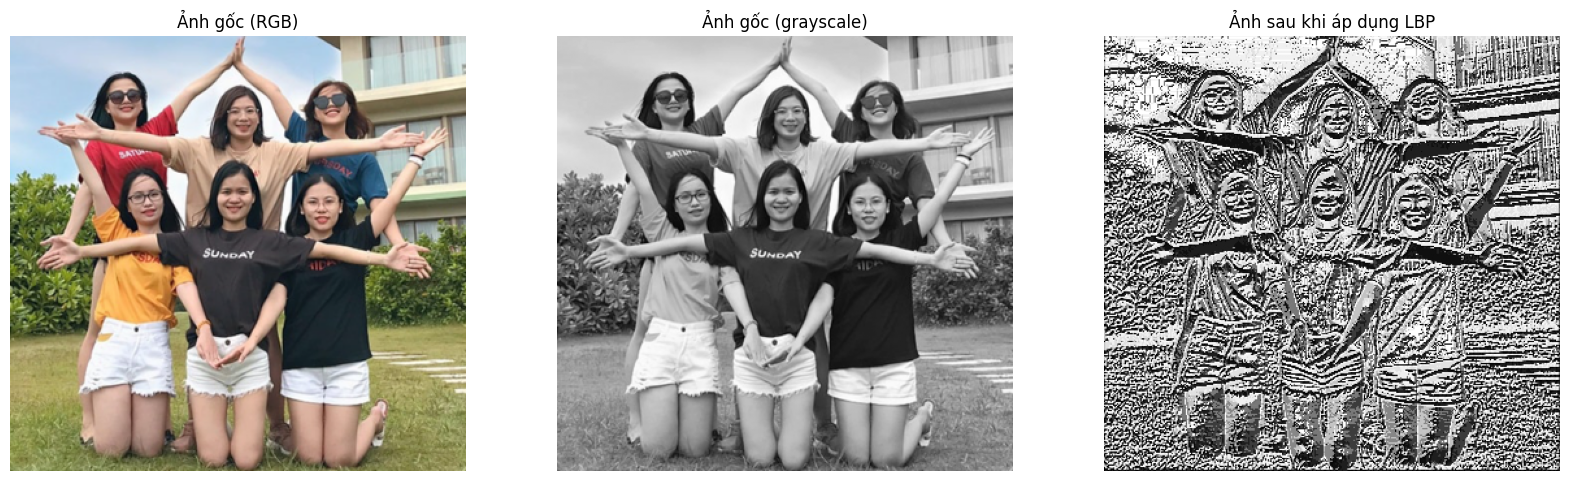

In [22]:
import math
import cv2
import numpy as np

class LBP(object):
    def __init__(self, radius=1, npoints=8, counter_clockwise=True, interpolation="bilinear"):
        self.radius = radius
        self.npoints = npoints
        self.interpolation = interpolation
        self.counter_clockwise= counter_clockwise
        assert self.radius > 0 and self.npoints > 0
        assert interpolation in ("bilinear", "nearest")
        self.get_pixel_func = self._get_pixel_nearest if self.interpolation == "nearest" else self._get_pixel_bilinear
        
        start_angle_radian = 0
        angle_radian = 2*math.pi/npoints
        circle_direction = 1 if counter_clockwise else -1
        neighbor_positions = []
        for pos in range(self.npoints):
            delta_x = math.cos(start_angle_radian+circle_direction*pos*angle_radian) * self.radius
            delta_y = -(math.sin(start_angle_radian+circle_direction*pos*angle_radian) * self.radius)
            neighbor_positions.append((delta_x, delta_y))
        neighbor_positions.reverse()
        self.neighbor_positions = neighbor_positions
        assert len(self.neighbor_positions) == npoints
        pass
    
    def _get_pixel_nearest(self, image, x, y, w, h):
        xx = round(x)
        yy = round(y)
        if xx < 0 or yy < 0 or xx >= w or yy >= h:
            return 0
        else:
            return image[yy, xx]
    
    def _get_pixel_bilinear(self, image, x, y, w, h):
        """
            x: float. Eg: 0.3
            y: float. Eg: 0.7
        """
        xmin, xmax = math.floor(x), math.ceil(x) # 0, 1
        ymin, ymax = math.floor(y), math.ceil(y) # 0, 1
        
        intensity_top_left = 0 if xmin<0 or ymin<0 or xmin>=w or ymin>=h else image[ymin, xmin]
        intensity_top_right = 0 if xmax<0 or ymin<0 or xmax>=w or ymin>=h else image[ymin, xmax]
        intensity_bottom_left = 0 if xmin<0 or ymax<0 or xmin>=w or ymax>=h else image[ymax, xmin]
        intensity_bottom_right = 0 if xmax<0 or ymax<0 or xmax>=w or ymax>=h else image[ymax, xmax]
        
        weight_x = x - xmin
        weight_y = y - ymin
        
        intensity_at_top = (1-weight_x) * intensity_top_left + weight_x * intensity_top_right
        intensity_at_bottom= (1-weight_x) * intensity_bottom_left + weight_x * intensity_bottom_right
        
        final_intensity = (1-weight_y) * intensity_at_top + weight_y * intensity_at_bottom        
        return final_intensity
    
    def __call__(self, image):
        assert len(image.shape) == 2
        h, w = image.shape
        result = np.zeros([h, w])
        for y in range(h):
            for x in range(w):
                center_intensity = image[y, x]
                binary_vector = [0] * self.npoints
                for npos in range(self.npoints):
                    new_x = x + self.neighbor_positions[npos][0]
                    new_y = y + self.neighbor_positions[npos][1]              
                    
                    neighbor_intensity = self.get_pixel_func(image, new_x, new_y, w, h)
                    
                    if center_intensity <= neighbor_intensity:
                        binary_vector[npos] = 1
                binary_str = "".join([str(e) for e in binary_vector]) # '00001001'
                decimal_value = int(binary_str, 2) # convert binary string to decimal
                result[y, x] = decimal_value
        return result

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_test/Screenshot 2025-05-19 114613.png'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)

# # In ra kích thước của ảnh
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = LBP(LBP_RADIUS, LBP_POINTS)
lbp = lbp(gray)
print(lbp)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


Kích thước ảnh: (100, 100, 3)
Kích thước ảnh sau khi thay đổi: (100, 100, 3)
Histogram LBP: [0.44523247 0.12923562 0.01654846 0.05437352 0.11899133 0.02836879
 0.04255319 0.14420804 0.01654846 0.00394011]
Ma trận LBP: [[193. 241. 241. ... 241. 241. 112.]
 [199. 255. 255. ... 255. 255. 124.]
 [199. 255. 255. ... 255. 255. 124.]
 ...
 [199. 255. 255. ... 255. 255. 124.]
 [199. 255. 255. ... 255. 255. 124.]
 [  7.  31.  31. ...  31.  31.  28.]]


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

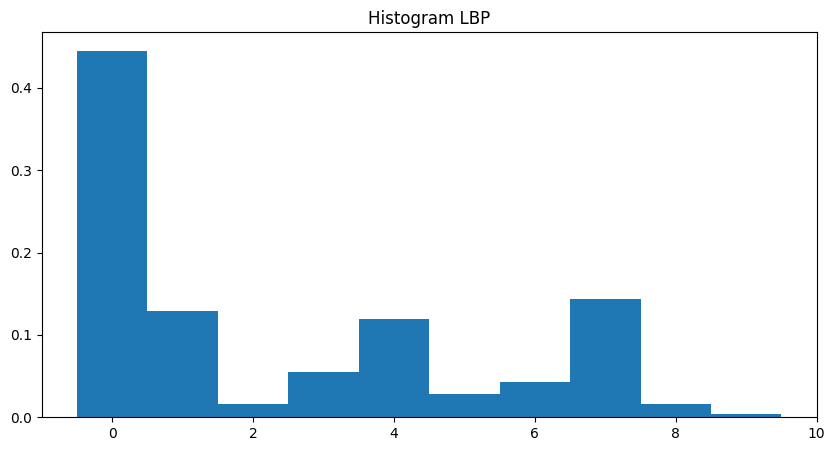

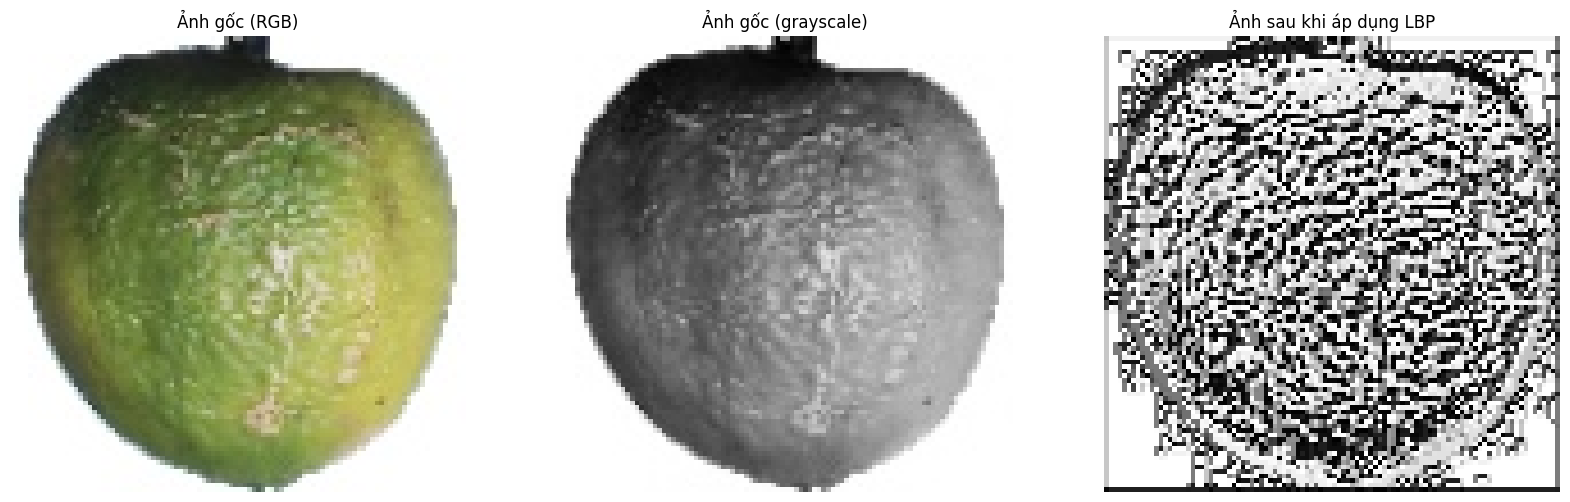

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Tham số cho LBP
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS

# Đọc ảnh và chuyển sang grayscale
image_path = 'Image_data/27_100.jpg'  # Đường dẫn tới ảnh của bạn

image = cv2.imread(image_path)
# In ra kích thước của ảnh
print("Kích thước ảnh:", image.shape)
image = cv2.resize(image, (100, 100))  # Thay đổi kích thước ảnh về 300x300
print("Kích thước ảnh sau khi thay đổi:", image.shape)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng LBP
lbp = local_binary_pattern(gray, LBP_POINTS, LBP_RADIUS, method="default")
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, LBP_POINTS + 3), range=(0, LBP_POINTS + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
print("Histogram LBP:", hist)
# In ra ma trix LBP
print("Ma trận LBP:", lbp)
# Vẽ histogram LBP
plt.figure(figsize=(10, 5))
plt.bar(range(0, LBP_POINTS + 2), hist, width=1)
plt.title('Histogram LBP')

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc (RGB)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Ảnh gốc (grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp, cmap='gray')
plt.title('Ảnh sau khi áp dụng LBP')
plt.axis('off')


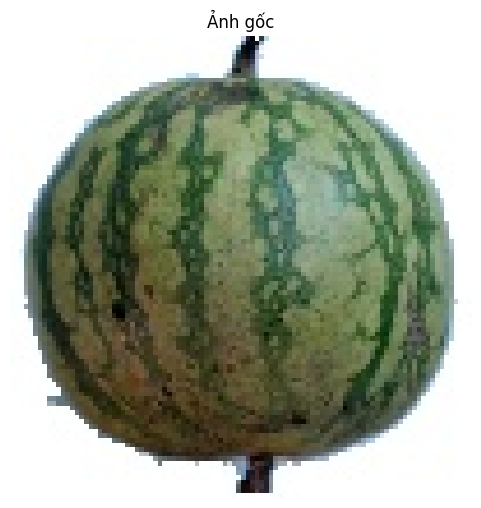

[0.0005662  0.01875324 0.00034509 0.0129284  0.0005662  0.0129051
 0.0008437  0.01214801 0.00049129 0.01055147 0.0008437  0.0108058
 0.00098252 0.00953857 0.00066894 0.00803421 0.00098252 0.0090723 ]


In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor

def extract_gabor_features(image, frequencies=[0.1, 0.2, 0.3], thetas=[0, np.pi/4, np.pi/2]):
    image = image.astype(np.float32) / 255.0
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = []
    for freq in frequencies:
        for theta in thetas:
            real, imag = gabor(gray, frequency=freq, theta=theta)
            mean_val = real.mean()
            std_val = real.std()
            features.extend([mean_val, std_val])
    return np.array(features)

# Load ảnh
image = cv2.imread('Image_data/0_100.jpg')  # Đường dẫn tới ảnh của bạn

# Hiển thị ảnh gốc
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Ảnh gốc')
plt.axis('off')
plt.show()

# Áp dụng Gabor
filtered_results = extract_gabor_features(image)

print(filtered_results)
